In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
my_path = "/content/gdrive/My Drive/ColabNotebooks/EVA4"

import sys
sys.path.append(my_path)
!ls /content/gdrive/My\ Drive/ColabNotebooks/EVA4

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
dataloader.py  display.py  dnn.py  evaluation.py  __pycache__  training.py


In [4]:
%matplotlib inline
import torch
import dataloader
import display
import dnn
import training
import evaluation

!pip install torchsummary
from torchsummary import summary

In [0]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

SEED = 22
batch_size=128

# CUDA?
cuda = torch.cuda.is_available()

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

In [7]:
train_loader, test_loader = dataloader.get_dataloader(batch_size=batch_size, num_workers=4)

CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


shape: torch.Size([128, 3, 32, 32])
  cat   car   cat  deer   car


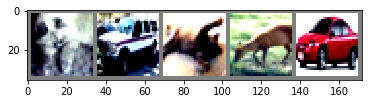

In [8]:
display.show_random_images(train_loader, classes)

In [9]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = dnn.Net().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,640
       BatchNorm2d-6           [-1, 32, 32, 32]              64
              ReLU-7           [-1, 32, 32, 32]               0
           Dropout-8           [-1, 32, 32, 32]               0
         MaxPool2d-9           [-1, 32, 16, 16]               0
           Conv2d-10           [-1, 64, 16, 16]          18,496
      BatchNorm2d-11           [-1, 64, 16, 16]             128
             ReLU-12           [-1, 64, 16, 16]               0
          Dropout-13           [-1, 64, 16, 16]               0
           Conv2d-14          [-1,

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)

In [12]:
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    training.train_model(model, device, train_loader, optimizer, criterion, epoch)
    training.test_model(model, device, criterion, test_loader)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=0.5114684104919434 Batch_id=390 Accuracy=77.60: 100%|██████████| 391/391 [00:15<00:00, 24.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 7356/10000 (73.56%)

EPOCH: 2


Loss=0.8476018905639648 Batch_id=390 Accuracy=78.83: 100%|██████████| 391/391 [00:15<00:00, 25.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0066, Accuracy: 7253/10000 (72.53%)

EPOCH: 3


Loss=0.5515326261520386 Batch_id=390 Accuracy=79.89: 100%|██████████| 391/391 [00:15<00:00, 25.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0065, Accuracy: 7260/10000 (72.60%)

EPOCH: 4


Loss=0.6305211782455444 Batch_id=390 Accuracy=80.60: 100%|██████████| 391/391 [00:15<00:00, 25.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 7533/10000 (75.33%)

EPOCH: 5


Loss=0.5213636159896851 Batch_id=390 Accuracy=81.56: 100%|██████████| 391/391 [00:15<00:00, 24.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 7588/10000 (75.88%)

EPOCH: 6


Loss=0.6306399703025818 Batch_id=390 Accuracy=82.30: 100%|██████████| 391/391 [00:15<00:00, 25.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 7498/10000 (74.98%)

EPOCH: 7


Loss=0.5090832710266113 Batch_id=390 Accuracy=83.21: 100%|██████████| 391/391 [00:15<00:00, 25.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7659/10000 (76.59%)

EPOCH: 8


Loss=0.5609327554702759 Batch_id=390 Accuracy=84.05: 100%|██████████| 391/391 [00:15<00:00, 25.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7662/10000 (76.62%)

EPOCH: 9


Loss=0.7657068371772766 Batch_id=390 Accuracy=84.50: 100%|██████████| 391/391 [00:15<00:00, 25.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7841/10000 (78.41%)

EPOCH: 10


Loss=0.6672551035881042 Batch_id=390 Accuracy=85.29: 100%|██████████| 391/391 [00:15<00:00, 25.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7667/10000 (76.67%)

EPOCH: 11


Loss=0.39719435572624207 Batch_id=390 Accuracy=85.60: 100%|██████████| 391/391 [00:15<00:00, 25.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 7567/10000 (75.67%)

EPOCH: 12


Loss=0.5402244329452515 Batch_id=390 Accuracy=86.33: 100%|██████████| 391/391 [00:15<00:00, 25.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 7841/10000 (78.41%)

EPOCH: 13


Loss=0.30461567640304565 Batch_id=390 Accuracy=86.96: 100%|██████████| 391/391 [00:15<00:00, 24.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 7579/10000 (75.79%)

EPOCH: 14


Loss=0.3259746730327606 Batch_id=390 Accuracy=87.25: 100%|██████████| 391/391 [00:16<00:00, 23.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7763/10000 (77.63%)

EPOCH: 15


Loss=0.5014594793319702 Batch_id=390 Accuracy=87.80: 100%|██████████| 391/391 [00:17<00:00, 22.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0055, Accuracy: 7765/10000 (77.65%)

EPOCH: 16


Loss=0.6356569528579712 Batch_id=390 Accuracy=88.19: 100%|██████████| 391/391 [00:16<00:00, 24.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7736/10000 (77.36%)

EPOCH: 17


Loss=0.3841552436351776 Batch_id=390 Accuracy=88.67: 100%|██████████| 391/391 [00:16<00:00, 23.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7912/10000 (79.12%)

EPOCH: 18


Loss=0.3477545380592346 Batch_id=390 Accuracy=89.22: 100%|██████████| 391/391 [00:17<00:00, 22.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7759/10000 (77.59%)

EPOCH: 19


Loss=0.3134433627128601 Batch_id=390 Accuracy=89.54: 100%|██████████| 391/391 [00:16<00:00, 24.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7775/10000 (77.75%)

EPOCH: 20


Loss=0.350686639547348 Batch_id=390 Accuracy=89.95: 100%|██████████| 391/391 [00:16<00:00, 24.21it/s]



Test set: Average loss: 0.0055, Accuracy: 7836/10000 (78.36%)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:   ship  frog   cat  ship  bird
Predicted:   ship  frog  bird  ship  bird


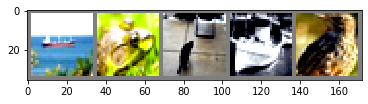

In [13]:
evaluation.show_predicted_actual(model, device, test_loader, classes)

In [14]:
evaluation.evaluate_accuracy(model, device, test_loader)

Accuracy of the network on the 10000 test images: 78 %


In [15]:
evaluation.evaluate_classwise_accuracy(model, device, classes, test_loader)

Accuracy of plane : 90 %
Accuracy of   car : 86 %
Accuracy of  bird : 60 %
Accuracy of   cat : 69 %
Accuracy of  deer : 97 %
Accuracy of   dog : 41 %
Accuracy of  frog : 77 %
Accuracy of horse : 82 %
Accuracy of  ship : 94 %
Accuracy of truck : 84 %
